In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import re
from scipy.stats import norm

In [2]:
# data from here: https://data.census.gov/cedsci/table?t=Age%20and%20Sex&g=0400000US55.860000&tid=ACSST5Y2019.S0101&hidePreview=false
# as ages.zip (then unzipped)

In [3]:
with open("ACSST5Y2019.S0101_data_with_overlays_2021-04-16T093338.csv") as f:
    reader = csv.reader(f)
    rows = list(reader)

df = pd.DataFrame(rows[2:], columns=rows[1])
df = df.set_index(df["Geographic Area Name"].apply(lambda z: z[-5:]))
df.head()

,id,Geographic Area Name,Estimate!!Total!!Total population,Margin of Error!!Total!!Total population,Estimate!!Total!!Total population!!AGE!!Under 5 years,Margin of Error!!Total!!Total population!!AGE!!Under 5 years,Estimate!!Total!!Total population!!AGE!!5 to 9 years,Margin of Error!!Total!!Total population!!AGE!!5 to 9 years,Estimate!!Total!!Total population!!AGE!!10 to 14 years,Margin of Error!!Total!!Total population!!AGE!!10 to 14 years,...,Estimate!!Percent Female!!Total population!!SUMMARY INDICATORS!!Age dependency ratio,Margin of Error!!Percent Female!!Total population!!SUMMARY INDICATORS!!Age dependency ratio,Estimate!!Percent Female!!Total population!!SUMMARY INDICATORS!!Old-age dependency ratio,Margin of Error!!Percent Female!!Total population!!SUMMARY INDICATORS!!Old-age dependency ratio,Estimate!!Percent Female!!Total population!!SUMMARY INDICATORS!!Child dependency ratio,Margin of Error!!Percent Female!!Total population!!SUMMARY INDICATORS!!Child dependency ratio,Estimate!!Percent Female!!Total population!!PERCENT ALLOCATED!!Sex,Margin of Error!!Percent Female!!Total population!!PERCENT ALLOCATED!!Sex,Estimate!!Percent Female!!Total population!!PERCENT ALLOCATED!!Age,Margin of Error!!Percent Female!!Total population!!PERCENT ALLOCATED!!Age
Geographic Area Name,,,,,,,,,,,,,,,,,,,,,
53001,8600000US53001,ZCTA5 53001,1882,127,85,27,83,29,103,31,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
53002,8600000US53002,ZCTA5 53002,2305,299,97,69,102,50,162,78,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
53003,8600000US53003,ZCTA5 53003,161,52,0,9,4,6,5,7,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
53004,8600000US53004,ZCTA5 53004,3334,199,147,52,159,40,265,57,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
53005,8600000US53005,ZCTA5 53005,20124,374,1239,185,1298,178,1304,195,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)


# Only Keep the Estimates per Demo/Zip

In [4]:
rows = []
for col in df.columns:
    m = re.match(r"Estimate!!(Male|Female)!!Total population!!AGE!!(.*)", col)
    if not m:
        continue
    for idx in df.index:
        rows.append([df.at[idx, "Geographic Area Name"].split()[-1], f"{m.group(1)} {m.group(2)}", int(df.at[idx, col])])
df = pd.DataFrame(rows, columns=["zip", "demo", "count"])
df.head()

,zip,demo,count
0,53001,Male Under 5 years,60
1,53002,Male Under 5 years,41
2,53003,Male Under 5 years,0
3,53004,Male Under 5 years,65
4,53005,Male Under 5 years,642


# Compute Percent Breakdown per Zip

In [5]:
dist = df.pivot(index="zip", columns="demo")
dist.head()

count                                              \
demo  Female 10 to 14 years Female 15 to 19 years Female 20 to 24 years   
zip                                                                       
53001                    51                    31                    53   
53002                    82                    65                    39   
53003                     5                     5                     0   
53004                    95                    87                   131   
53005                   634                   393                   299   

                                                                         \
demo  Female 25 to 29 years Female 30 to 34 years Female 35 to 39 years   
zip                                                                       
53001                    35                    30                    70   
53002                    91                    91                    45   
53003                     0                     9                     0   
53004                    82                    82                   114   
53005                   383                   624                   557   

                                                                       \
demo  Female 40 to 44 years Female 45 to 49 years Female 5 to 9 years   
zip                                                                     
53001                    51                    81                  39   
53002                    73                   116                  62   
53003                     0                    12                   4   
53004                   134                   153                  86   
53005                   564                   643                 600   

                             ...                                        \
demo  Female 50 to 54 years  ... Male 5 to 9 years Male 50 to 54 years   
zip                          ...                                         
53001                    95  ...                44                  78   
53002                    62  ...                40                 105   
53003                     5  ...                 0                   0   
53004                   125  ...                73                 151   
53005                   658  ...               698                 609   

                                                                   \
demo  Male 55 to 59 years Male 60 to 64 years Male 65 to 69 years   
zip                                                                 
53001                 105                 102                  68   
53002                  94                 120                  13   
53003                  11                   6                   4   
53004                 145                  69                  95   
53005                 767                 745                 776   

                                                                   \
demo  Male 70 to 74 years Male 75 to 79 years Male 80 to 84 years   
zip                                                                 
53001                  55                  23                  23   
53002                  38                  62                   3   
53003                   5                   4                   4   
53004                  37                  35                  29   
53005                 512                 319                 269   

                                                 
demo  Male 85 years and over Male Under 5 years  
zip                                              
53001                      7                 60  
53002                      6                 41  
53003                      0                  0  
53004                     27                 65  
53005                    238                642  

[5 rows x 36 columns]

In [6]:
dist = dist / dist.sum(axis=1).values.reshape(-1,1)
dist.to_csv("age_dist.csv", index=False)
dist.head()

count                                              \
demo  Female 10 to 14 years Female 15 to 19 years Female 20 to 24 years   
zip                                                                       
53001              0.027099              0.016472              0.028162   
53002              0.035575              0.028200              0.016920   
53003              0.031056              0.031056              0.000000   
53004              0.028494              0.026095              0.039292   
53005              0.031505              0.019529              0.014858   

                                                                         \
demo  Female 25 to 29 years Female 30 to 34 years Female 35 to 39 years   
zip                                                                       
53001              0.018597              0.015940              0.037194   
53002              0.039479              0.039479              0.019523   
53003              0.000000              0.055901              0.000000   
53004              0.024595              0.024595              0.034193   
53005              0.019032              0.031008              0.027678   

                                                                       \
demo  Female 40 to 44 years Female 45 to 49 years Female 5 to 9 years   
zip                                                                     
53001              0.027099              0.043039            0.020723   
53002              0.031670              0.050325            0.026898   
53003              0.000000              0.074534            0.024845   
53004              0.040192              0.045891            0.025795   
53005              0.028026              0.031952            0.029815   

                             ...                                        \
demo  Female 50 to 54 years  ... Male 5 to 9 years Male 50 to 54 years   
zip                          ...                                         
53001              0.050478  ...          0.023379            0.041445   
53002              0.026898  ...          0.017354            0.045553   
53003              0.031056  ...          0.000000            0.000000   
53004              0.037493  ...          0.021896            0.045291   
53005              0.032697  ...          0.034685            0.030262   

                                                                   \
demo  Male 55 to 59 years Male 60 to 64 years Male 65 to 69 years   
zip                                                                 
53001            0.055792            0.054198            0.036132   
53002            0.040781            0.052061            0.005640   
53003            0.068323            0.037267            0.024845   
53004            0.043491            0.020696            0.028494   
53005            0.038114            0.037020            0.038561   

                                                                   \
demo  Male 70 to 74 years Male 75 to 79 years Male 80 to 84 years   
zip                                                                 
53001            0.029224            0.012221            0.012221   
53002            0.016486            0.026898            0.001302   
53003            0.031056            0.024845            0.024845   
53004            0.011098            0.010498            0.008698   
53005            0.025442            0.015852            0.013367   

                                                 
demo  Male 85 years and over Male Under 5 years  
zip                                              
53001               0.003719           0.031881  
53002               0.002603           0.017787  
53003               0.000000           0.000000  
53004               0.008098           0.019496  
53005               0.011827           0.031902  

[5 rows x 36 columns]

# Generate Random Users

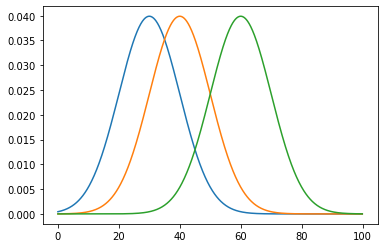

In [7]:
x = np.arange(0, 100, 0.1)
plt.plot(x, norm.pdf(x, 30, 10))
plt.plot(x, norm.pdf(x, 40, 10))
plt.plot(x, norm.pdf(x, 60, 10))

In [8]:
idxs = np.random.choice(len(df), size=500, p=df["count"]/df["count"].sum())
samp = df.iloc[idxs].copy()
samp["age"] = samp["demo"].apply(lambda demo: int(re.findall(r"\d+", demo)[0]))
samp["ad1"] = np.random.rand(len(samp)) < norm.pdf(samp["age"], 30, 10) * 20
samp["ad2"] = np.random.rand(len(samp)) < norm.pdf(samp["age"], 40, 10) * 20
samp["ad3"] = np.random.rand(len(samp)) < norm.pdf(samp["age"], 60, 10) * 20
samp = samp[["zip", "age", "ad1", "ad2", "ad3"]]
samp.iloc[:500].to_csv("visits1.csv", index=False)
samp.iloc[500:].to_csv("visits2.csv", index=False)
samp.head()

,zip,age,ad1,ad2,ad3
21487,54650,45,False,False,False
12218,54703,75,False,False,False
25044,53901,70,False,False,True
9382,53140,60,False,False,True
25375,54701,70,False,False,False
